# Final position


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

import sys

sys.path.append("..")

from utils.custom_cvs import VariableTimeSeriesSplit
from utils.visualization import model_test

import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


The first objective attribute to be addressed will be the final position of each driver.


In [2]:
df = pd.read_csv("../assets/data/processed/base_model.csv")

mid_rc = df.groupby("raceYear")["raceRound"].max().to_numpy() // 2
get_half = lambda x: f'{x["raceYear"]}{x["raceRound"] <= mid_rc[x["raceYear"] - 2006]}'
instances_per_half = df.apply(get_half, axis=1).value_counts(sort=False).to_numpy()

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

X = pd.read_csv("../assets/data/processed/base_model_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=3):
CV with make_scorer(balanced_accuracy_score): 0.09883673565491748
CV with neg_mean_absolute_error: -5.15225009585664
              precision    recall  f1-score   support

           1       0.30      0.57      0.40       252
           2       0.16      0.28      0.20       252
           3       0.09      0.15      0.11       252
           4       0.06      0.08      0.07       252
           5       0.06      0.11      0.08       252
           6       0.05      0.10      0.07       252
           7       0.07      0.12      0.09       252
           8       0.06      0.08      0.07       252
           9       0.06      0.08      0.07       252
          10       0.07      0.08      0.08       252
          11       0.07      0.08      0.08       252
          12       0.08      0.08      0.08       252
          13       0.06      0.04      0.05       252
          14       0.09      0.06      0.07       252
    

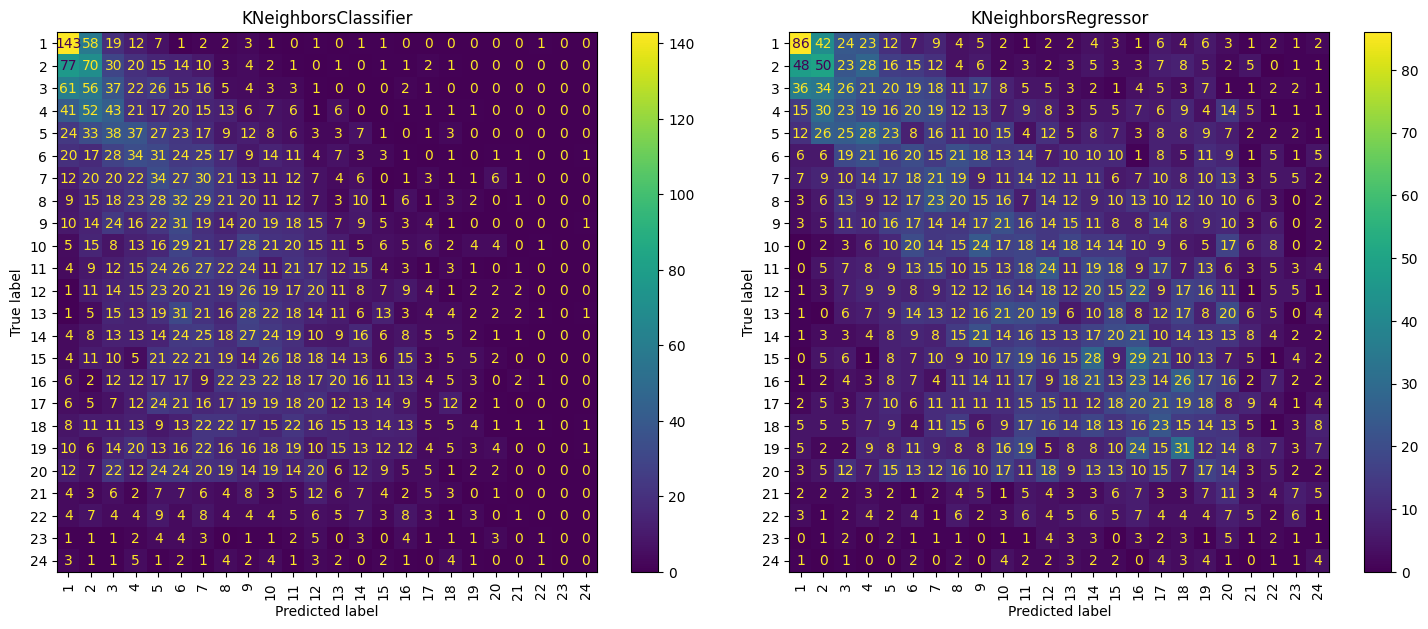

In [3]:
knn = (
    KNeighborsClassifier(n_neighbors=3, metric="euclidean", n_jobs=-1),
    KNeighborsRegressor(n_neighbors=1, metric="euclidean", n_jobs=-1),
)
model_test(knn, X, y, tscv)

## Decision Tree


DecisionTreeClassifier(criterion='entropy', max_depth=5):
CV with make_scorer(balanced_accuracy_score): 0.1318922617786254
CV with neg_mean_absolute_error: -3.8910710995724873
              precision    recall  f1-score   support

           1       0.46      0.68      0.55       252
           2       0.20      0.18      0.19       252
           3       0.18      0.24      0.20       252
           4       0.16      0.20      0.18       252
           5       0.10      0.12      0.11       252
           6       0.15      0.16      0.16       252
           7       0.09      0.17      0.12       252
           8       0.08      0.06      0.07       252
           9       0.12      0.15      0.13       252
          10       0.05      0.03      0.04       252
          11       0.05      0.08      0.06       252
          12       0.08      0.15      0.10       252
          13       0.07      0.08      0.08       252
          14       0.08      0.06      0.07       252
          15 

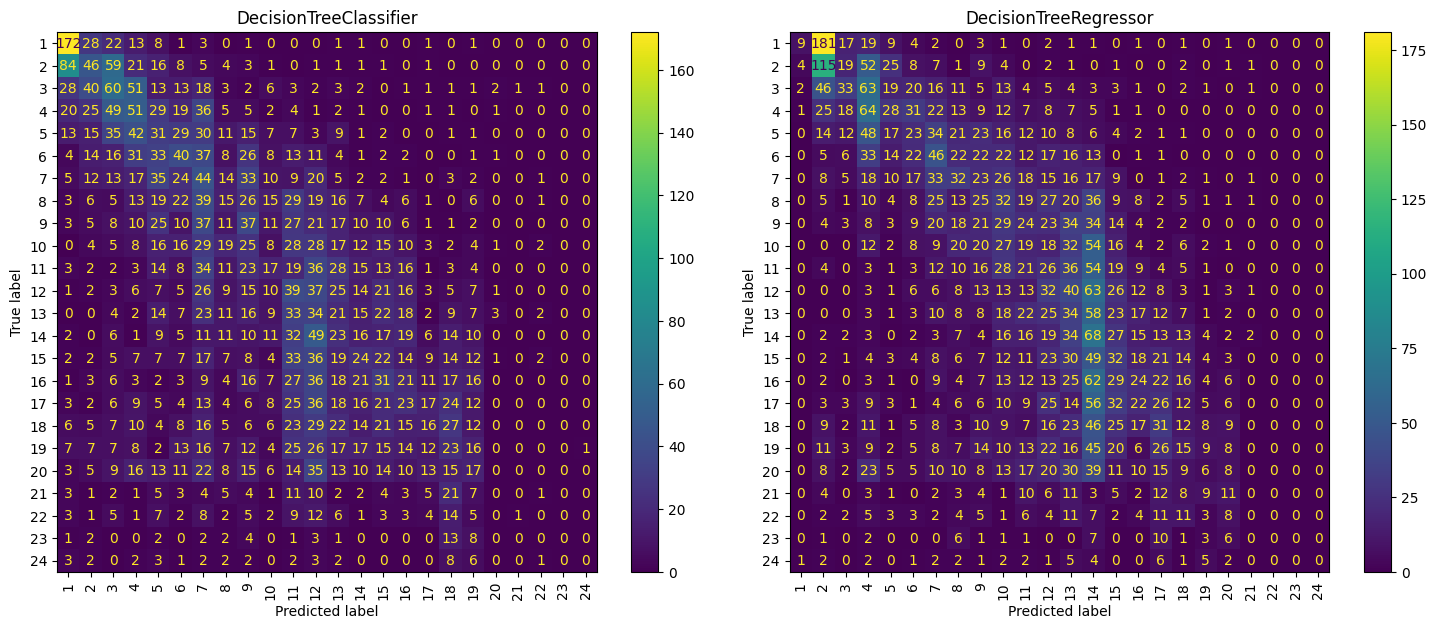

In [4]:
tree = (
    DecisionTreeClassifier(max_depth=5, criterion="entropy"),
    DecisionTreeRegressor(max_depth=4, criterion="absolute_error"),
)
model_test(tree, X, y, tscv)

## Random Forest


RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10,
                       n_jobs=-1):
CV with make_scorer(balanced_accuracy_score): 0.1256304154599609
CV with neg_mean_absolute_error: -4.036275922575698
              precision    recall  f1-score   support

           1       0.35      0.67      0.46       252
           2       0.15      0.15      0.15       252
           3       0.13      0.15      0.14       252
           4       0.13      0.17      0.15       252
           5       0.12      0.13      0.12       252
           6       0.12      0.18      0.14       252
           7       0.09      0.10      0.10       252
           8       0.07      0.06      0.06       252
           9       0.09      0.09      0.09       252
          10       0.07      0.06      0.06       252
          11       0.07      0.09      0.08       252
          12       0.11      0.17      0.13       252
          13       0.10      0.12      0.11       252
          14     

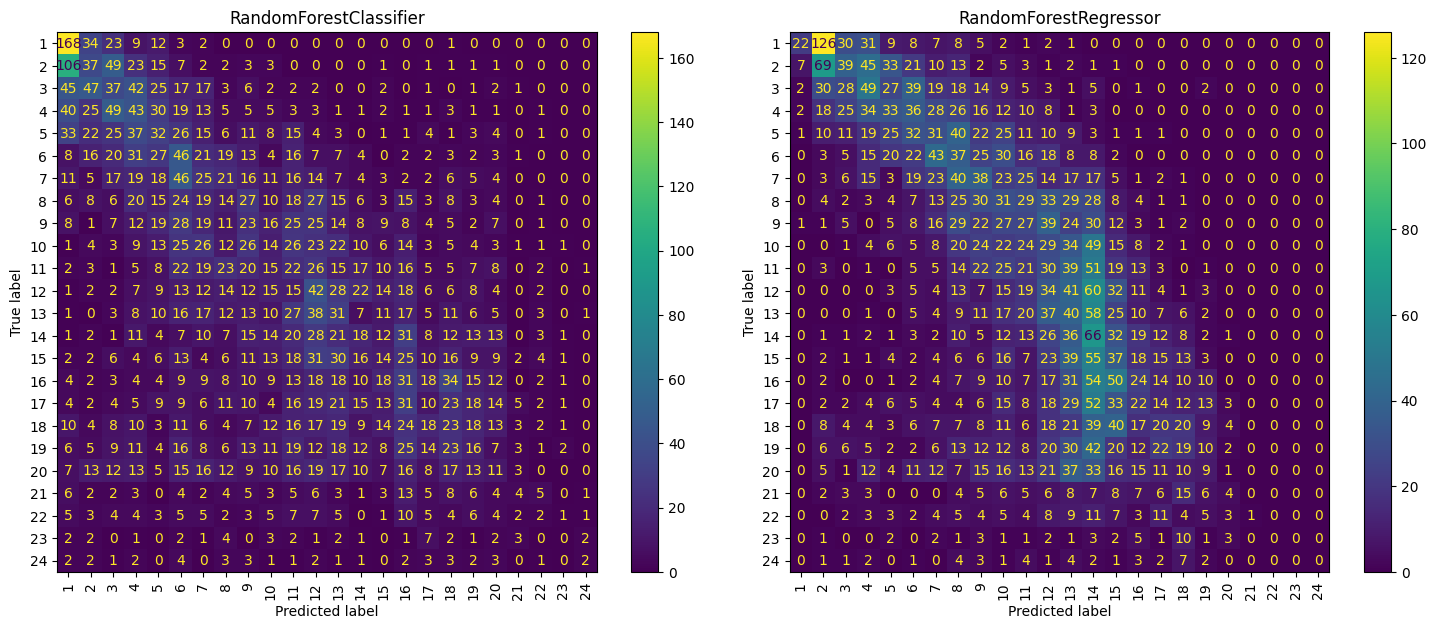

In [5]:
random_forest = (
    RandomForestClassifier(
        n_estimators=10, max_depth=5, criterion="entropy", n_jobs=-1
    ),
    RandomForestRegressor(
        n_estimators=10, max_depth=5, criterion="absolute_error", n_jobs=-1
    ),
)
model_test(random_forest, X, y, tscv)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 25)):
CV with make_scorer(balanced_accuracy_score): 0.13408508158508156
CV with neg_mean_absolute_error: -3.6802642112522546
              precision    recall  f1-score   support

           1       0.41      0.80      0.54       252
           2       0.19      0.17      0.18       252
           3       0.17      0.16      0.16       252
           4       0.15      0.13      0.14       252
           5       0.12      0.14      0.13       252
           6       0.10      0.18      0.13       252
           7       0.11      0.17      0.13       252
           8       0.08      0.04      0.06       252
           9       0.09      0.08      0.08       252
          10       0.08      0.06      0.07       252
          11       0.08      0.13      0.10       252
          12       0.10      0.08      0.09       252
          13       0.07      0.10      0.09       252
          14       0.12      0.07      0.09       252
   

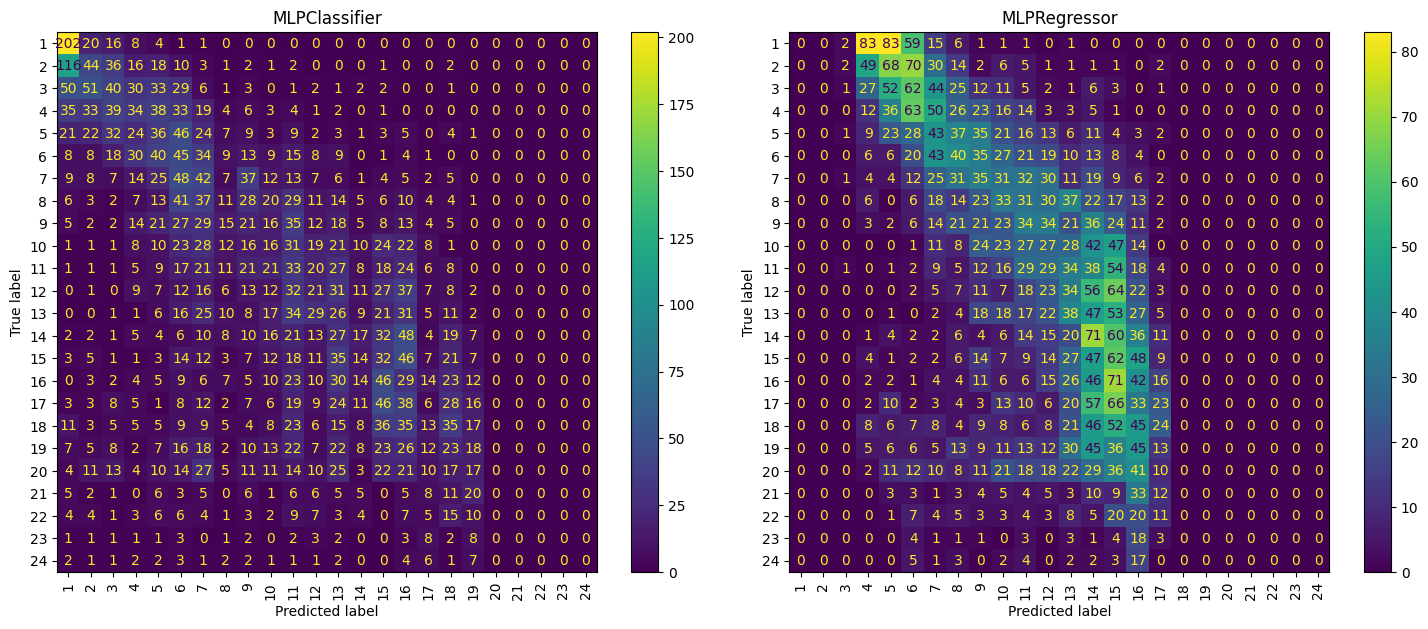

In [6]:
nn = (
    MLPClassifier(hidden_layer_sizes=(50, 25), activation="logistic"),
    MLPRegressor(hidden_layer_sizes=(60, 30), activation="logistic"),
)
model_test(nn, X, y, tscv)